# Indexing HDX
Example notebook how to index a HDX dataset

In [1]:
import pandas as pd
from worldex.datasets.hdx import HDXDataset
from pathlib import Path
from h3ronpy.arrow import cells_parse
from h3ronpy.pandas.vector import cells_dataframe_to_geodataframe
import contextily as cx
import json

/Users/jtmiclat/.pyenv/versions/3.10.12/envs/worldex/lib/python3.10/site-packages/quantulum3/classifier.py:28: UserWarning: Classifier dependencies not installed. Run pip install quantulum3[classifier] to install them. The classifer helps to dissambiguate units.
  warnings.warn(


In [2]:
# We are using hdx which needs to be configured
from hdx.api.configuration import Configuration
from hdx.data.dataset import Dataset

Configuration.create(hdx_site="prod", user_agent="worldex", hdx_read_only=True)

'https://data.humdata.org'

In [3]:
# fetch hdx geodata
datasets = Dataset.search_in_hdx("has_geodata:true")
datasets

[{'archived': True, 'batch': 'f8e9e2b5-fe60-4c42-99a6-7ac0f593d581', 'caveats': '', 'creator_user_id': 'df293517-8faf-4c06-bdf2-b7039daa832c', 'data_update_frequency': '-1', 'dataset_date': '[2014-09-11T00:00:00 TO 2014-09-11T23:59:59]', 'dataset_preview': 'first_resource', 'dataset_source': 'WFP', 'has_geodata': True, 'has_quickcharts': False, 'has_showcases': True, 'id': 'a8f96977-6758-430d-a876-53b61f43d7c7', 'indicator': '0', 'is_requestdata_type': False, 'isopen': False, 'last_modified': '2015-11-24T23:36:52.186628', 'license_id': 'cc-by-igo', 'license_title': 'Creative Commons Attribution for Intergovernmental Organisations', 'license_url': 'http://creativecommons.org/licenses/by/3.0/igo/legalcode', 'maintainer': '11abd576-1afe-4be3-8df7-3358685afa98', 'metadata_created': '2014-09-04T15:56:59.057240', 'metadata_modified': '2022-09-09T12:36:26.022568', 'methodology': 'Other', 'methodology_other': 'Data compiled by the GIS/VAM Unit of WFP Mali', 'name': 'mali-road-network', 'notes'

In [3]:
# Create dir to save files
path = Path(f"../data/hdx/hotosm_afg_populated_places")
path.mkdir(parents=True, exist_ok=True)

In [4]:
afg_populated_places = HDXDataset.from_id("hotosm_afg_populated_places")
afg_populated_places.set_dir(path)
afg_populated_places.index()

h3_index
0     8820905b09fffff
1     882093c443fffff
2     88435b9453fffff
3     8820b338a7fffff
4     8843599315fffff
...               ...
6456  88426576a9fffff
6457  88426576adfffff
6458  88426576e5fffff
6459  88426576e7fffff
6460  88426574e3fffff

[6461 rows x 1 columns]

In [5]:
with open(path / "metadata.json") as f:
    metadata = json.load(f)
metadata

{'name': 'Afghanistan Populated Places (OpenStreetMap Export)',
 'source_org': 'HDX',
 'last_fetched': '2023-11-13T14:47:30.445210',
 'files': ['https://s3.us-east-1.amazonaws.com/exports-stage.hotosm.org/hotosm_afg_populated_places_points_shp_shp_uid_32bc15a3-aea3-441c-9e98-f9c70317f4c4.zip',
  'https://s3.us-east-1.amazonaws.com/exports-stage.hotosm.org/hotosm_afg_populated_places_polygons_shp_shp_uid_8ac3f7ed-e3eb-4d69-a8e7-627429e1547d.zip',
  'https://export.hotosm.org/downloads/5e703c63-b407-4f2e-9b1c-edadf53ff1f9/hotosm_afg_populated_places_gpkg.zip',
  'https://s3.us-east-1.amazonaws.com/exports-stage.hotosm.org/hotosm_afg_populated_places_points_kml_kml_uid_7b63e8d5-0ba6-4a22-912c-1f21d3e1ffbd.zip',
  'https://s3.us-east-1.amazonaws.com/exports-stage.hotosm.org/hotosm_afg_populated_places_polygons_kml_kml_uid_d2259e2c-ba40-4cea-af0f-6151ef1efbd6.zip',
  'https://export.hotosm.org/downloads/5e703c63-b407-4f2e-9b1c-edadf53ff1f9/hotosm_afg_gmapsupp_img.zip',
  'https://s3.us-east

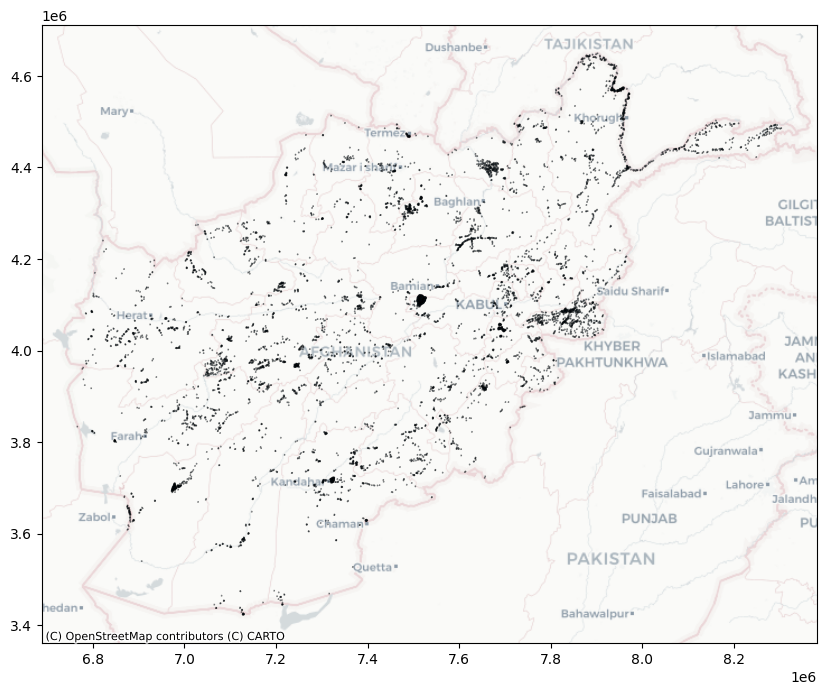

In [6]:
h3 = pd.read_parquet(path / "h3.parquet")

h3_gdf = cells_dataframe_to_geodataframe(
    pd.DataFrame({"cell": cells_parse(h3.h3_index)})
)
h3_gdf_reprojected = h3_gdf.to_crs(epsg=3857)
ax = h3_gdf_reprojected.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)